# Simple Convolutional Neural Network

## train a simple CNN on MNIST dataset.

### 1. Loading Essential Packages

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

Using TensorFlow backend.


### 2. Seting the hyper-parameters Value

In [3]:
batch_size = 128    # Here we define the batch size value
num_classes = 10    # Assign the number of class exists in MNIST dataset
epochs = 12       # Total Number of iteratin on mnist dataset 
img_rows, img_cols = 28, 28        # input image dimensions

### 3. Loading MNIST Dataset

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 4. This is an advance topic and not essential to be adept at this!

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### 5. Here we are going to do:
1. Change variables type
2. Normalized the numbers in a range between 0 and 1
3. Get the exact dimension of each variable

In [6]:
x_train = x_train.astype('float32')      # This is the way we change the variable type
x_test = x_test.astype('float32')
x_train /= 255                           # Here we normalize the data between 0 and 1
x_test /= 255 

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### 6. Using this way, you can find which classes each data point belongs to!

In [8]:
print(y_train[0])    # This refers to that the sample #1 is related to Class 5
print(y_train[53])
print(y_train[624])

5
4
7


### 7.Convert target representation from a simple scalar to one-hot representation:
One-Hot encoding. A one hot encoding is a representation of categorical variables as binary vectors. Each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.
**for example [0,0,0,0,0,0,1,0,0,0] represent number 6**


In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
print(y_train[0])    # above command assign 1 to 5th element of a vector and others have value 0.

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 8.we are going to define a sequential model describer in following:
- Conv2D: filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (1, 28, 28)
- Conv2D: filters = 64, kernel_size = (3,3), activation = 'relu'
- MaxPooling2D: pool_size=(2, 2)
- Dropout: rate = 0.25
- Flatten
- Dense: units = 128, activation='relu'
- Dropout: rate = 0.5
- Dense: units = 10, activation='softmax' **its important beacause we have 10 different type of output**

In [11]:
model = Sequential()
model.add(Conv2D(40,kernel_size=(3,3),activation='relu',input_shape=(28, 28,1)))
model.add(Conv2D(80,(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

### 9. Same as before, we need to compile our above model with an optimizer and a caregorical loss function. You already know it.
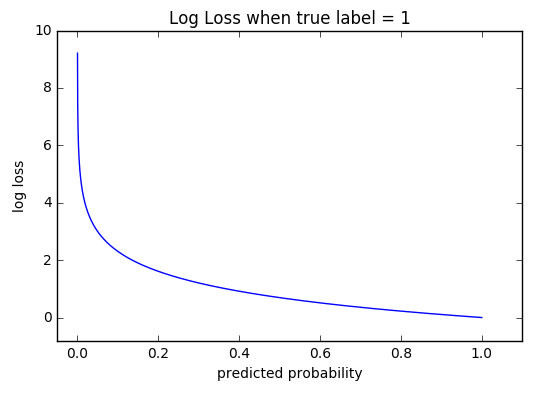
# <center>loss function graph</center>

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### 10. Here, we try to fit our model on MNIST Dataset
**Batch_size is very important parameter to catch high accuracy**

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

<br>Train on 60000 samples, validate on 10000 samples
Epoch 1/12
<br>60000/60000 [==============================] - 14s 226us/step - loss: 0.1972 - acc: 0.9397 - val_loss: 0.0593 - val_acc: 0.9808
Epoch 2/12
<br>60000/60000 [==============================] - 13s 213us/step - loss: 0.0497 - acc: 0.9848 - val_loss: 0.0363 - val_acc: 0.9888
Epoch 3/12
<br>384/60000 [..............................] - ETA: 12s - loss: 0.0129 - acc: 0.994860000/60000 [==============================] - 13s 212us/step - loss: 0.0328 - acc: 0.9898 - val_loss: 0.0294 - val_acc: 0.9904
Epoch 4/12
<br>60000/60000 [==============================] - 13s 210us/step - loss: 0.0241 - acc: 0.9928 - val_loss: 0.0281 - val_acc: 0.9913
Epoch 5/12
<br>22784/60000 [==========>...................] - ETA: 7s - loss: 0.0163 - acc: 0.994560000/60000 [==============================] - 13s 211us/step - loss: 0.0168 - acc: 0.9944 - val_loss: 0.0360 - val_acc: 0.9884
Epoch 6/12
<br>60000/60000 [==============================] - 13s 217us/step - loss: 0.0132 - acc: 0.9959 - val_loss: 0.0315 - val_acc: 0.9902
Epoch 7/12
<br>25728/60000 [===========>..................] - ETA: 7s - loss: 0.0093 - acc: 0.997060000/60000 [==============================] - 13s 217us/step - loss: 0.0109 - acc: 0.9965 - val_loss: 0.0307 - val_acc: 0.9908
Epoch 8/12
<br>60000/60000 [==============================] - 13s 212us/step - loss: 0.0079 - acc: 0.9976 - val_loss: 0.0349 - val_acc: 0.9887
Epoch 9/12
<br>27264/60000 [============>.................] - ETA: 6s - loss: 0.0067 - acc: 0.997760000/60000 [==============================] - 13s 212us/step - loss: 0.0068 - acc: 0.9978 - val_loss: 0.0342 - val_acc: 0.9902
Epoch 10/12
<br>60000/60000 [==============================] - 13s 215us/step - loss: 0.0056 - acc: 0.9983 - val_loss: 0.0368 - val_acc: 0.9902
Epoch 11/12
<br>26624/60000 [============>.................] - ETA: 6s - loss: 0.0044 - acc: 0.998960000/60000 [==============================] - 13s 217us/step - loss: 0.0042 - acc: 0.9987 - val_loss: 0.0339 - val_acc: 0.9916
Epoch 12/12
<br>60000/60000 [==============================] - 13s 220us/step - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0414 - val_acc: 0.9899
<keras.callbacks.History at 0x7f14b7955a90>
## I copied results beacause of time

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04136581849972936
<br>Test accuracy: 0.9899

## Pre-trained models and Data Augmentation:
In this section, we are going to use a pre-trained model called MobileNet. Using this network and a new dataset, we train a newly defined Convolutinal Neural Network. A comprehensive list of goals are presented bellow

1. Finetuning A pre-trained deep neural network
2. Training on a new dataset gave you before handson.
3. Data Augmenting using KERAS Utilities.

In [2]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

Using TensorFlow backend.


### 0. Hyper-parameters definition

In [3]:
img_width, img_height = 128, 128    # input image has size (3, 128, 128)
train_data_dir = "data/train"    # Location of training data
validation_data_dir = "data/val"    # Location of validation data
nb_train_samples = 244       # Total Number of Training samples
nb_validation_samples = 153       # Total Number of Validations samples
batch_size = 16
epochs = 50

### 1.load MobileNet  ;)

In [4]:
model = applications.MobileNet(weights="imagenet",include_top=False,input_shape=(128, 128,3))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 130, 130, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 66, 66, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
__________

### 2. try to freeze just all of the layers in model included above. look at slides if you need
**freezing layers makes them effectless**

In [6]:
# Freeze the first five layers which you don't want to train. 
for layer in model.layers:   ######## You shold change this line ########
    layer.trainable = False

### 3. Here we are going to attach the new classifier at the end of pretrained model. This is a new technique whcih we are going to explore more.
- Flatten Layer
- Desne Layer: units: 1024, activation = "relu"
- Dropout: rate = 0.5
- Desne Layer: units: 512, activation = "relu"
- Desne Layer: units: 2, activation = "softamax"


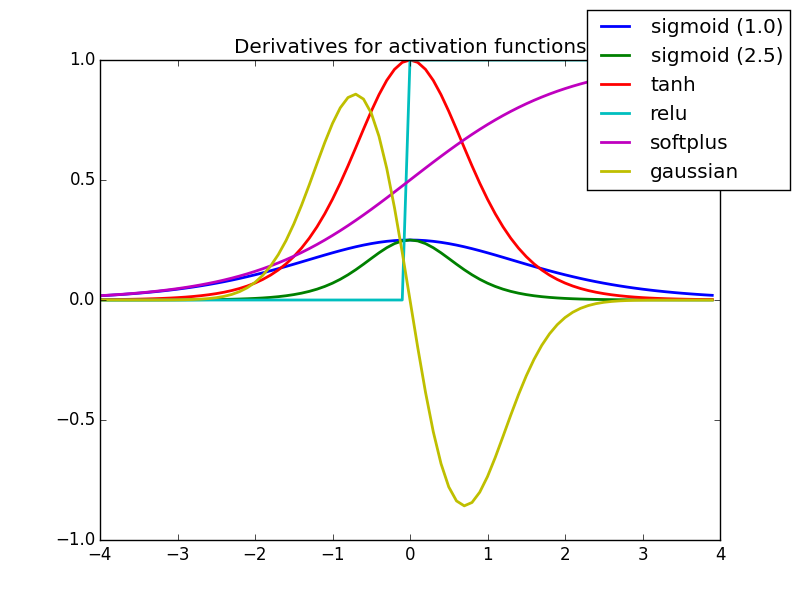
## <center>Activations</center>

In [7]:
#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(512,activation = "relu")(x)
x = Dropout(0.5)(x)
x = Dense(512,activation = "relu")(x)
predictions = Dense(2,activation = "softmax")(x)
 

In [8]:
# creating the final model 
model_final = Model(inputs = model.input, outputs = predictions)

In [9]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 130, 130, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 66, 66, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
__________

In [10]:
# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

### 4. Define a data augmentator:
- rescale = 1./255
- horizontal_flip = True
- fill_mode = "nearest"
- zoom_range = 0.6
- width_shift_range = 0.2
- height_shift_range=0.4
- rotation_range=25

In [11]:
# This an augmentator for test dataset
test_datagen = ImageDataGenerator(rescale = 1./255,
                    horizontal_flip = True,
                    fill_mode = "nearest",
                    zoom_range = 0.6,
                    width_shift_range = 0.2,
                    height_shift_range=0.4,
                    rotation_range=25)